In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"{self.data}"  
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    def tanh(self):
        x = self.data
        t =  (math.exp(2*x) -1)/ (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
        

In [9]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

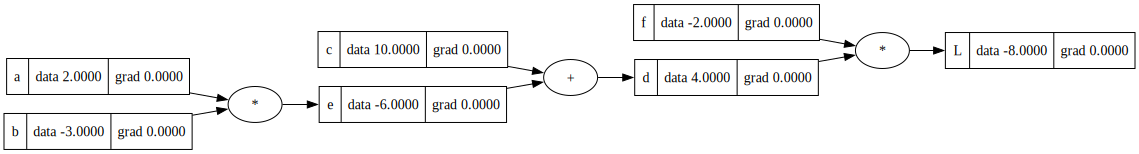

In [16]:
draw_dot(L)


In [5]:
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d* f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d* f; L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)
lol()

-3.9999999999995595


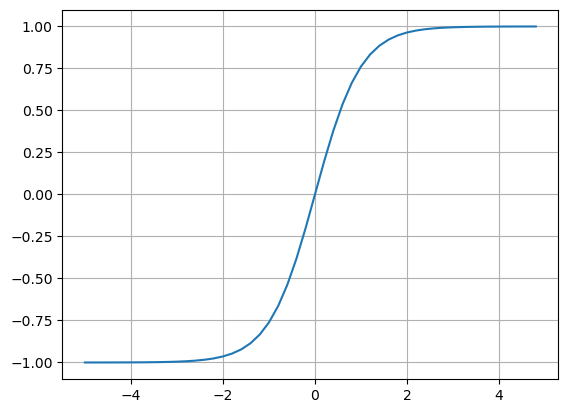

In [8]:
plt.plot(np.arange(-5, 5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();


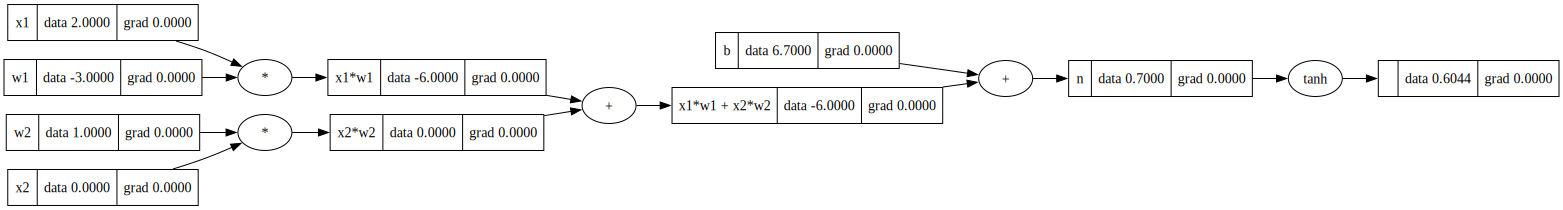

In [12]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh()
draw_dot(o)

